<!--NAVIGATION-->
< [Customizing Ticks](04.10-Customizing-Ticks.ipynb) | [Contents](Index.ipynb) | [Three-Dimensional Plotting in Matplotlib](04.12-Three-Dimensional-Plotting.ipynb) >

# Customizing Matplotlib: Configurations and Stylesheets

Matplotlib's default plot settings are often the subject of complaint among its users.
While much is slated to change in the 2.0 Matplotlib release in late 2016, the ability to customize default settings helps bring the package inline with your own aesthetic preferences.

Here we'll walk through some of Matplotlib's runtime configuration (rc) options, and take a look at the newer *stylesheets* feature, which contains some nice sets of default configurations.

## Plot Customization by Hand

Through this chapter, we've seen how it is possible to tweak individual plot settings to end up with something that looks a little bit nicer than the default.
It's possible to do these customizations for each individual plot.
For example, here is a fairly drab default histogram:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

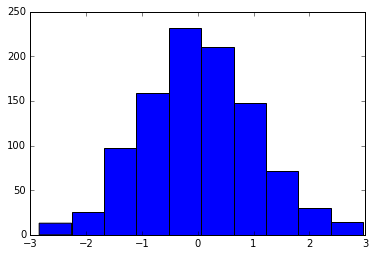

In [2]:
x = np.random.randn(1000)
plt.hist(x);

We can adjust this by hand to make it a much more visually pleasing plot:

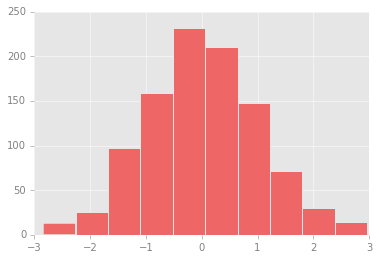

In [3]:
# use a gray background
ax = plt.axes(axisbg='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

This looks better, and you may recognize the look as inspired by the look of the R language's ggplot visualization package.
But this took a whole lot of effort!
We definitely do not want to have to do all that tweaking each time we create a plot.
Fortunately, there is a way to adjust these defaults once in a way that will work for all plots.

## Changing the Defaults: ``rcParams``

Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create.
This configuration can be adjusted at any time using the ``plt.rc`` convenience routine.
Let's see what it looks like to modify the rc parameters so that our default plot will look similar to what we did before.

We'll start by saving a copy of the current ``rcParams`` dictionary, so we can easily reset these changes in the current session:

In [4]:
IPython_default = plt.rcParams.copy()

Now we can use the ``plt.rc`` function to change some of these settings:

In [5]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

With these settings defined, we can now create a plot and see our settings in action:

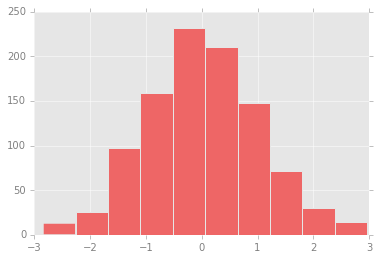

In [6]:
plt.hist(x);

Let's see what simple line plots look like with these rc parameters:

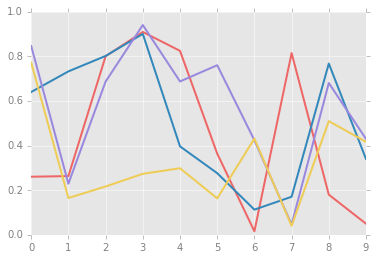

In [7]:
for i in range(4):
    plt.plot(np.random.rand(10))

I find this much more aesthetically pleasing than the default styling.
If you disagree with my aesthetic sense, the good news is that you can adjust the rc parameters to suit your own tastes!
These settings can be saved in a *.matplotlibrc* file, which you can read about in the [Matplotlib documentation](http://Matplotlib.org/users/customizing.html).
That said, I prefer to customize Matplotlib using its stylesheets instead.

## Stylesheets

The version 1.4 release of Matplotlib in August 2014 added a very convenient ``style`` module, which includes a number of new default stylesheets, as well as the ability to create and package your own styles. These stylesheets are formatted similarly to the *.matplotlibrc* files mentioned earlier, but must be named with a *.mplstyle* extension.

Even if you don't create your own style, the stylesheets included by default are extremely useful.
The available styles are listed in ``plt.style.available``—here I'll list only the first five for brevity:

In [8]:
plt.style.available[:5]

['fivethirtyeight',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'ggplot',
 'grayscale']

The basic way to switch to a stylesheet is to call

``` python
plt.style.use('stylename')
```

But keep in mind that this will change the style for the rest of the session!
Alternatively, you can use the style context manager, which sets a style temporarily:

``` python
with plt.style.context('stylename'):
    make_a_plot()
```


Let's create a function that will make two basic types of plot:

In [9]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

We'll use this to explore how these plots look using the various built-in styles.

### Default style

The default style is what we've been seeing so far throughout the book; we'll start with that.
First, let's reset our runtime configuration to the notebook default:

In [10]:
# reset rcParams
plt.rcParams.update(IPython_default);

Now let's see how it looks:

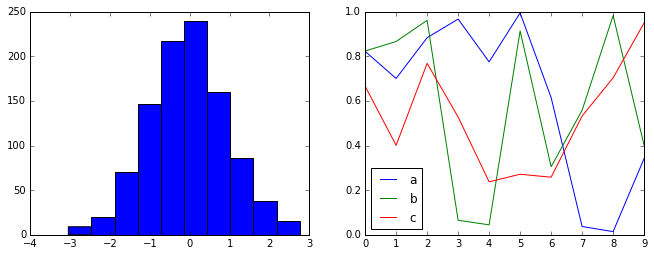

In [11]:
hist_and_lines()

### FiveThiryEight style

The ``fivethirtyeight`` style mimics the graphics found on the popular [FiveThirtyEight website](https://fivethirtyeight.com).
As you can see here, it is typified by bold colors, thick lines, and transparent axes:

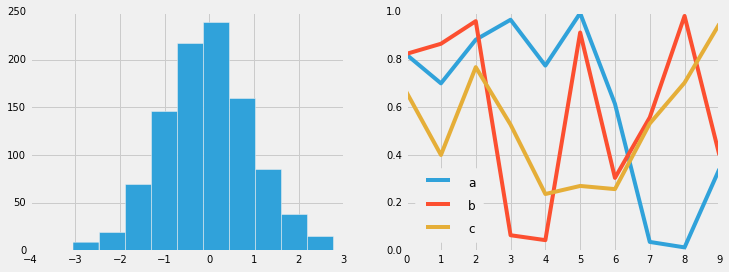

In [12]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot

The ``ggplot`` package in the R language is a very popular visualization tool.
Matplotlib's ``ggplot`` style mimics the default styles from that package:

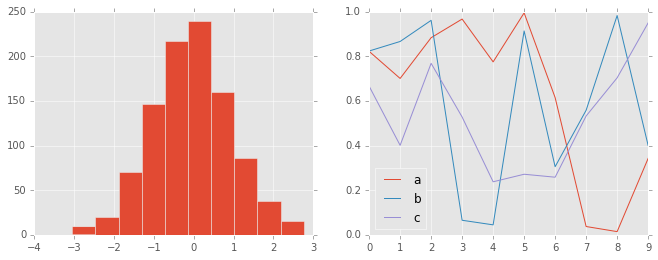

In [13]:
with plt.style.context('ggplot'):
    hist_and_lines()

### *Bayesian Methods for Hackers( style

There is a very nice short online book called [*Probabilistic Programming and Bayesian Methods for Hackers*](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/); it features figures created with Matplotlib, and uses a nice set of rc parameters to create a consistent and visually-appealing style throughout the book.
This style is reproduced in the ``bmh`` stylesheet:

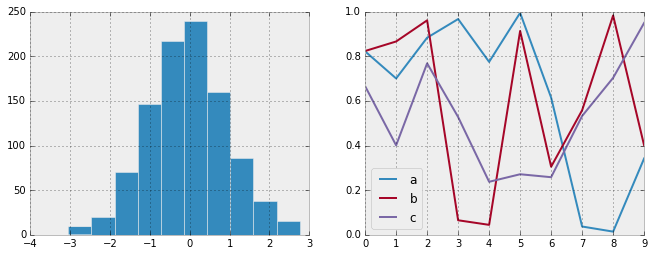

In [14]:
with plt.style.context('bmh'):
    hist_and_lines()

### Dark background

For figures used within presentations, it is often useful to have a dark rather than light background.
The ``dark_background`` style provides this:

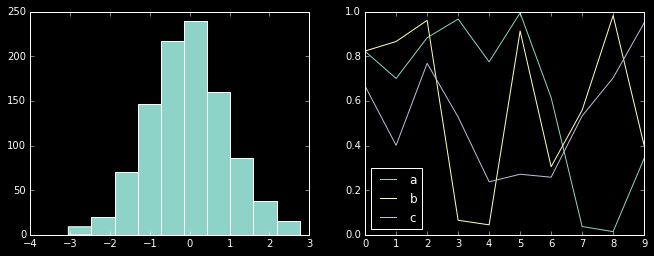

In [15]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Grayscale

Sometimes you might find yourself preparing figures for a print publication that does not accept color figures.
For this, the ``grayscale`` style, shown here, can be very useful:

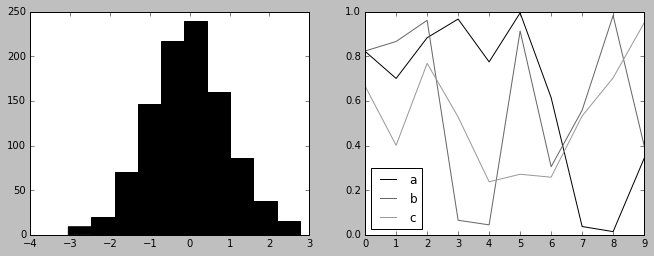

In [16]:
with plt.style.context('grayscale'):
    hist_and_lines()

### Seaborn style

Matplotlib also has stylesheets inspired by the Seaborn library (discussed more fully in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).
As we will see, these styles are loaded automatically when Seaborn is imported into a notebook.
I've found these settings to be very nice, and tend to use them as defaults in my own data exploration.

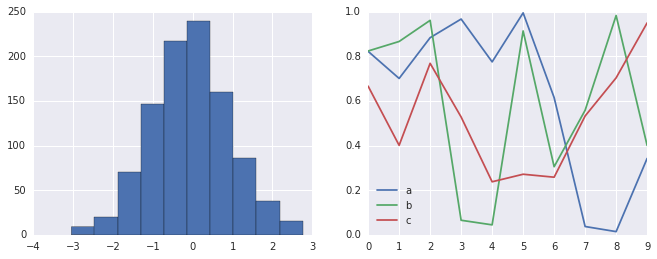

In [17]:
import seaborn
hist_and_lines()

With all of these built-in options for various plot styles, Matplotlib becomes much more useful for both interactive visualization and creation of figures for publication.
Throughout this book, I will generally use one or more of these style conventions when creating plots.

<!--NAVIGATION-->
< [Customizing Ticks](04.10-Customizing-Ticks.ipynb) | [Contents](Index.ipynb) | [Three-Dimensional Plotting in Matplotlib](04.12-Three-Dimensional-Plotting.ipynb) >